In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from warnings import filterwarnings
filterwarnings('ignore')

# Field and Description

Diabetes_binary        0 = no diabetes / 1 = prediabetes or diabetes
HighBP                 0 = no high BP / 1 = high BP
HighChol               0 = no high cholesterol / 1 = high cholesterol
CholCheck              0 = no cholesterol check in 5 years / 1 = yes cholesterol check in 5 years
BMI                    Body Mass Index
Smoker                 Have you smoked at least 100 cigarettes in your entire life? 
                       [Note: 5 packs = 100 cigarettes] 0 =no  / 1 = yes
Stroke                 (Ever told) you had a stroke. 0 = no / 1 = yes
HeartDiseaseorAttack   coronary heart disease (CHD) or myocardial infarction (MI) 0 = no / 1 = yes
PhysActivity           physical activity in past 30 days - not including job 0 = no / 1 = yes
Fruits                 Consume Fruit 1 or more times per day 0 = no / 1 = yes
Veggies                Consume Vegetables 1 or more times per day 0 = no / 1 = yes
HvyAlcoholConsump      Heavy drinkers (adult men having more than 14 drinks per week and adult women having                          more than 7 drinks per
AnyHealthcare          Have any kind of health care coverage, including health insurance, prepaid plans such                         as HMO, etc. 0 = no / 1 = yes
NoDocbcCost            Was there a time in the past 12 months when you needed to see a doctor but could not                          because of cost? 0 = no / 1 = yes
GenHlth                Would you say that in general your health is: scale 1-5 1 = excellent / 2 = very good 
                       3 = good / 4 = fair 5 = poor
MentHlth               days of poor mental health scale 1-30 days
PhysHlth               physical illness or injury days in past 30 days scale 1-30   
DiffWalk               Do you have serious difficulty walking or climbing stairs? 0 = no / 1 = yes
Sex                    0 = female / 1 = male
Age                    13-level age category (_AGEG5YR see codebook) 1 = 18-24 / 9 = 60-64 /13 = 80 or older
Education              Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only                              kindergarten / 2 = Elementery /3.some High School/ 4.High school graduate/5.some                              college or technical school/ 6. college graduate.
Income                 Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 / 5 = less than                           $35,000 / 8 = $75,000 or more

# Load Data as DataFrame

In [4]:
data= pd.read_csv("diabetes_binary_5050split_health_indicators.csv")
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4.0,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12.0,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13.0,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11.0,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8.0,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1,0,1,1,37,0,0,0,0,0,...,1,0,4,0,0,0,0,6.0,4,1
70688,1,0,1,1,29,1,0,1,0,1,...,1,0,2,0,0,1,1,10.0,3,6
70689,1,1,1,1,25,0,0,1,0,1,...,1,0,5,15,0,1,0,NaN,6,4
70690,1,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,NaN,2,4


show first 5 row with all columns

In [6]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4.0,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12.0,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13.0,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11.0,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8.0,5,8


Understand Dataset

In [8]:
data.shape

(70692, 22)

In [9]:
data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  int64  
 1   HighBP                70692 non-null  int64  
 2   HighChol              70692 non-null  int64  
 3   CholCheck             70692 non-null  int64  
 4   BMI                   70692 non-null  int64  
 5   Smoker                70692 non-null  int64  
 6   Stroke                70692 non-null  int64  
 7   HeartDiseaseorAttack  70692 non-null  int64  
 8   PhysActivity          70692 non-null  int64  
 9   Fruits                70692 non-null  int64  
 10  Veggies               70692 non-null  int64  
 11  HvyAlcoholConsump     70692 non-null  int64  
 12  AnyHealthcare         70692 non-null  int64  
 13  NoDocbcCost           70692 non-null  int64  
 14  GenHlth               70692 non-null  int64  
 15  MentHlth           

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,70692.0,0.500000,0.500004,0.0,0.0,0.5,1.0,1.0
HighBP,70692.0,0.563458,0.495960,0.0,0.0,1.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
Stroke,70692.0,0.062171,0.241468,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0


# Data Cleaning

In [13]:
data.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [14]:
data.isnull().sum()

Diabetes_binary           0
HighBP                    0
HighChol                  0
CholCheck                 0
BMI                       0
Smoker                    0
Stroke                    0
HeartDiseaseorAttack      0
PhysActivity              0
Fruits                    0
Veggies                   0
HvyAlcoholConsump         0
AnyHealthcare             0
NoDocbcCost               0
GenHlth                   0
MentHlth                  0
PhysHlth                  0
DiffWalk                  0
Sex                       0
Age                     159
Education                 0
Income                    0
dtype: int64

In [15]:
data.dropna(how= "any",axis=0, inplace=True)

In [16]:
data.duplicated().sum()

1633

In [17]:
data.drop_duplicates(inplace=True)

In [18]:
data.shape

(68900, 22)

Organize Columns

In [20]:
data=data.rename(columns={'Diabetes_binary': 'Diabetes'})

In [21]:
data=data.reindex(columns=[ 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income','Diabetes'])

In [22]:
data.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
0,1,0,1,26,0,0,0,1,0,1,...,0,3,5,30,0,1,4.0,6,8,0
1,1,1,1,26,1,1,0,0,1,0,...,0,3,0,0,0,1,12.0,6,8,0
2,0,0,1,26,0,0,0,1,1,1,...,0,1,0,10,0,1,13.0,6,8,0
3,1,1,1,28,1,0,0,1,1,1,...,0,3,0,3,0,1,11.0,6,8,0
4,0,0,1,29,1,0,0,1,1,1,...,0,2,0,0,0,0,8.0,5,8,0


In [23]:
for col in data.columns:
  print(f"{col} : {data[col].value_counts()}\n")

HighBP : HighBP
1    39360
0    29540
Name: count, dtype: int64

HighChol : HighChol
1    36603
0    32297
Name: count, dtype: int64

CholCheck : CholCheck
1    67163
0     1737
Name: count, dtype: int64

BMI : BMI
27    6107
26    4787
28    4438
30    4273
24    4160
      ... 
85       1
83       1
80       1
78       1
74       1
Name: count, Length: 80, dtype: int64

Smoker : Smoker
0    35693
1    33207
Name: count, dtype: int64

Stroke : Stroke
0    64517
1     4383
Name: count, dtype: int64

HeartDiseaseorAttack : HeartDiseaseorAttack
0    58506
1    10394
Name: count, dtype: int64

PhysActivity : PhysActivity
1    47992
0    20908
Name: count, dtype: int64

Fruits : Fruits
1    41724
0    27176
Name: count, dtype: int64

Veggies : Veggies
1    54031
0    14869
Name: count, dtype: int64

HvyAlcoholConsump : HvyAlcoholConsump
0    65902
1     2998
Name: count, dtype: int64

AnyHealthcare : AnyHealthcare
1    65720
0     3180
Name: count, dtype: int64

NoDocbcCost : NoDocbcCost
0

# EDA

In [25]:
data_male = data[(data['Sex'] == 1)&(data['Diabetes'] == 1)]
data_male.count()

HighBP                  16711
HighChol                16711
CholCheck               16711
BMI                     16711
Smoker                  16711
Stroke                  16711
HeartDiseaseorAttack    16711
PhysActivity            16711
Fruits                  16711
Veggies                 16711
HvyAlcoholConsump       16711
AnyHealthcare           16711
NoDocbcCost             16711
GenHlth                 16711
MentHlth                16711
PhysHlth                16711
DiffWalk                16711
Sex                     16711
Age                     16711
Education               16711
Income                  16711
Diabetes                16711
dtype: int64

# Frequency of diabetics of all ages for male

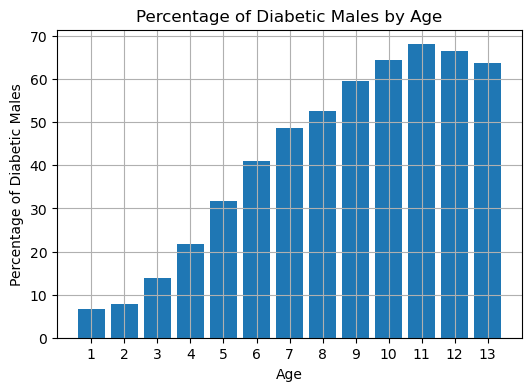

Maximum percentage of diabetic males is 68.05% at age 11.


In [27]:
# frequency of diabetics of all ages for male

data_male = data[data['Sex'] == 1]
male_diabetic_by_age = data_male.groupby('Age')['Diabetes'].mean().reset_index()
plt.figure(figsize=(6, 4))
plt.bar(male_diabetic_by_age['Age'], male_diabetic_by_age['Diabetes'] * 100)
plt.xlabel('Age')
plt.ylabel('Percentage of Diabetic Males')
plt.title('Percentage of Diabetic Males by Age')
plt.xticks(male_diabetic_by_age['Age'])
plt.grid(True)
plt.show()

max_percent_age = male_diabetic_by_age.loc[male_diabetic_by_age['Diabetes'].idxmax()]
print("Maximum percentage of diabetic males is {:.2f}% at age {}."
      .format(max_percent_age['Diabetes'] * 100, int(max_percent_age['Age'])))

# frequency of diabetics of all ages for female

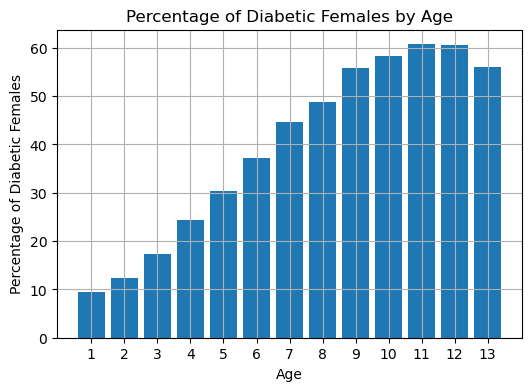

Maximum percentage of diabetic females is 60.70% at age 11.


In [29]:
# frequency of diabetics of all ages for female

data_female = data[data['Sex'] == 0]
female_diabetic_by_age = data_female.groupby('Age')['Diabetes'].mean().reset_index()
plt.figure(figsize=(6, 4))
plt.bar(female_diabetic_by_age['Age'], female_diabetic_by_age['Diabetes'] * 100)
plt.xlabel('Age')
plt.ylabel('Percentage of Diabetic Females')
plt.title('Percentage of Diabetic Females by Age')
plt.xticks(female_diabetic_by_age['Age'])
plt.grid(True)
plt.show()

max_percent_age = female_diabetic_by_age.loc[female_diabetic_by_age['Diabetes'].idxmax()]
print("Maximum percentage of diabetic females is {:.2f}% at age {}."
      .format(max_percent_age['Diabetes'] * 100, int(max_percent_age['Age'])))

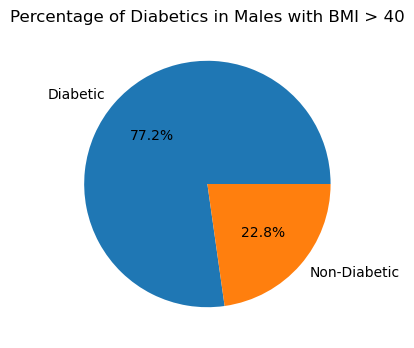

Percentage of diabetics in males with BMI > 40: 77.2%


In [30]:
# Filter data for males with BMI > 40
male_high_bmi = data[(data['Sex'] == 1) & (data['BMI'] > 40)]

# Calculate percentage of diabetics
total_male_high_bmi = len(male_high_bmi)
diabetic_male_high_bmi = len(male_high_bmi[male_high_bmi['Diabetes'] == 1])
percent_diabetic = (diabetic_male_high_bmi / total_male_high_bmi) * 100

# Create a pie chart
plt.figure(figsize=(6, 4))
plt.pie([percent_diabetic, 100 - percent_diabetic], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Males with BMI > 40')
plt.show()

print(f"Percentage of diabetics in males with BMI > 40: {percent_diabetic:.1f}%")

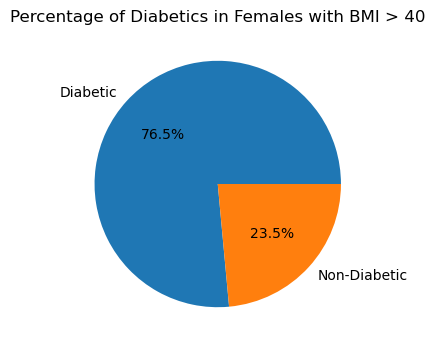

Percentage of diabetics in females with BMI > 40: 76.5%


In [31]:
# Filter data for females with BMI > 40
female_high_bmi = data[(data['Sex'] == 0) & (data['BMI'] > 40)]

# Calculate percentage of diabetics
total_female_high_bmi = len(female_high_bmi)
diabetic_female_high_bmi = len(female_high_bmi[female_high_bmi['Diabetes'] == 1])
percent_diabetic = (diabetic_female_high_bmi / total_female_high_bmi) * 100

# Create a pie chart
plt.figure(figsize=(6, 4))
plt.pie([percent_diabetic, 100 - percent_diabetic], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Females with BMI > 40')
plt.show()

print(f"Percentage of diabetics in females with BMI > 40: {percent_diabetic:.1f}%")

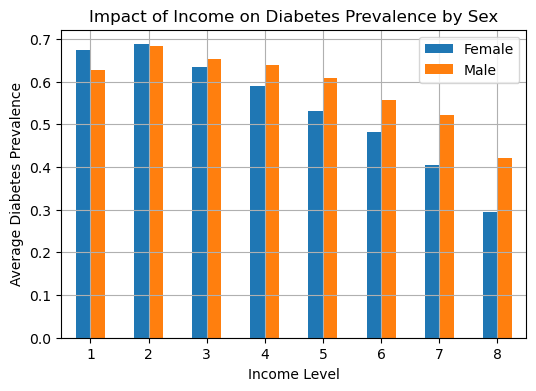

In [32]:
# the percent impact of income  in  diabetic for male and female
# Group data by income and sex, and calculate the mean diabetes prevalence
income_diabetes_by_sex = data.groupby(['Income', 'Sex'])['Diabetes'].mean().unstack()

# Plot the bar chart
income_diabetes_by_sex.plot(kind='bar', figsize=(6, 4))
plt.xlabel('Income Level')
plt.ylabel('Average Diabetes Prevalence')
plt.title('Impact of Income on Diabetes Prevalence by Sex')
plt.xticks(rotation=0)
plt.legend(['Female', 'Male'])
plt.grid(True)
plt.show()

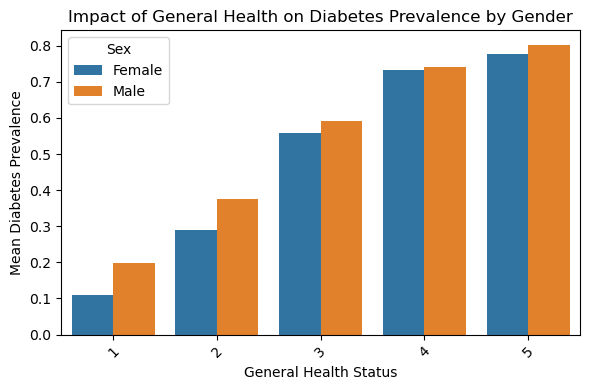

In [33]:
# the percent impact of genhlth  in  diabetic for male and female
# Group data by gender and general health, then calculate mean diabetes prevalence
grouped_data = data.groupby(['Sex', 'GenHlth'])['Diabetes'].mean().reset_index()

# Map sex values to labels
grouped_data['Sex'] = grouped_data['Sex'].map({0: 'Female', 1: 'Male'})

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x='GenHlth', y='Diabetes', hue='Sex', data=grouped_data)
plt.xlabel('General Health Status')
plt.ylabel('Mean Diabetes Prevalence')
plt.title('Impact of General Health on Diabetes Prevalence by Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

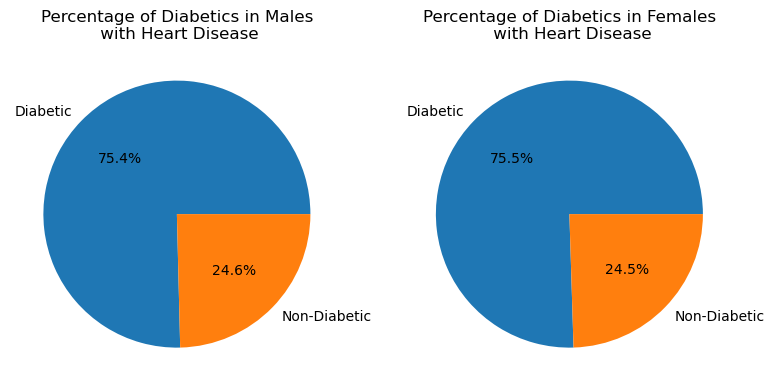

Percentage of diabetics in males with heart disease: 75.4%
Percentage of diabetics in males without heart disease: 47.9%
Percentage of diabetics in females with heart disease: 75.5%
Percentage of diabetics in females without heart disease: 45.3%


In [34]:
#the percent impact of   HeartDiseaseorAttack in diabetic for male and female

male_heart_disease = data[(data['Sex'] == 1) & (data['HeartDiseaseorAttack'] == 1)]
male_no_heart_disease = data[(data['Sex'] == 1) & (data['HeartDiseaseorAttack'] == 0)]
female_heart_disease = data[(data['Sex'] == 0) & (data['HeartDiseaseorAttack'] == 1)]
female_no_heart_disease = data[(data['Sex'] == 0) & (data['HeartDiseaseorAttack'] == 0)]

# Calculate percentages of diabetics for each group
male_hd_diabetic_percent = (male_heart_disease['Diabetes'].sum() / len(male_heart_disease)) * 100
male_nohd_diabetic_percent = (male_no_heart_disease['Diabetes'].sum() / len(male_no_heart_disease)) * 100
female_hd_diabetic_percent = (female_heart_disease['Diabetes'].sum() / len(female_heart_disease)) * 100
female_nohd_diabetic_percent = (female_no_heart_disease['Diabetes'].sum() / len(female_no_heart_disease)) * 100

# Create pie charts
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.pie([male_hd_diabetic_percent, 100 - male_hd_diabetic_percent], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Males\n with Heart Disease')

plt.subplot(1, 2, 2)
plt.pie([female_hd_diabetic_percent, 100 - female_hd_diabetic_percent], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Females\n with Heart Disease')

plt.tight_layout()
plt.show()

print(f"Percentage of diabetics in males with heart disease: {male_hd_diabetic_percent:.1f}%")
print(f"Percentage of diabetics in males without heart disease: {male_nohd_diabetic_percent:.1f}%")
print(f"Percentage of diabetics in females with heart disease: {female_hd_diabetic_percent:.1f}%")
print(f"Percentage of diabetics in females without heart disease: {female_nohd_diabetic_percent:.1f}%")

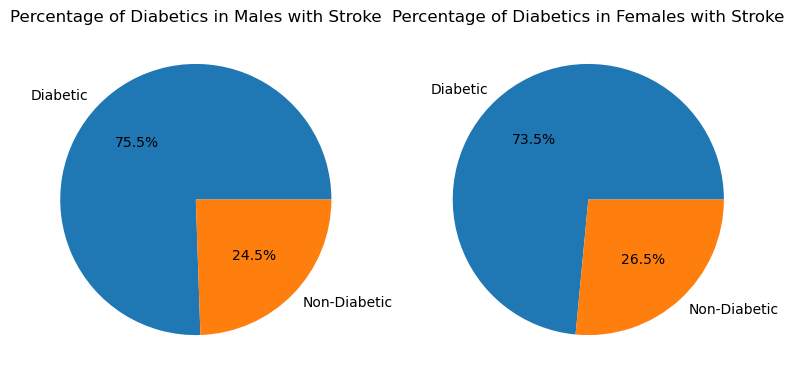

Percentage of diabetics in males with stroke: 75.5%
Percentage of diabetics in females with stroke: 73.5%


In [35]:
# the percent impact of Stroke  in diabetic for male and female
# Filter data for males and females with stroke
male_stroke = data[(data['Sex'] == 1) & (data['Stroke'] == 1)]
female_stroke = data[(data['Sex'] == 0) & (data['Stroke'] == 1)]

# Calculate percentage of diabetics for males with stroke
total_male_stroke = len(male_stroke)
diabetic_male_stroke = len(male_stroke[male_stroke['Diabetes'] == 1])
percent_diabetic_male_stroke = (diabetic_male_stroke / total_male_stroke) * 100

# Calculate percentage of diabetics for females with stroke
total_female_stroke = len(female_stroke)
diabetic_female_stroke = len(female_stroke[female_stroke['Diabetes'] == 1])
percent_diabetic_female_stroke = (diabetic_female_stroke / total_female_stroke) * 100

# Create pie charts
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.pie([percent_diabetic_male_stroke, 100 - percent_diabetic_male_stroke],
        labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Males with Stroke')

plt.subplot(1, 2, 2)
plt.pie([percent_diabetic_female_stroke, 100 - percent_diabetic_female_stroke],
        labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Females with Stroke')

plt.tight_layout()
plt.show()

print(f"Percentage of diabetics in males with stroke: {percent_diabetic_male_stroke:.1f}%")
print(f"Percentage of diabetics in females with stroke: {percent_diabetic_female_stroke:.1f}%")

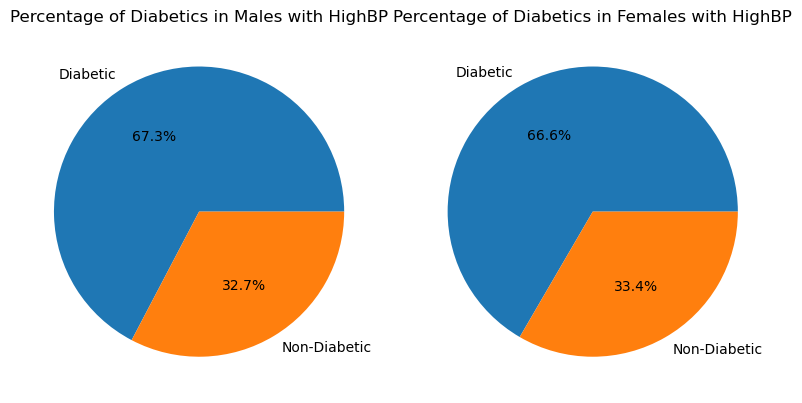

In [36]:
#the percent impact of HighBP  in  diabetic for male and female
male_highbp = data[(data['Sex'] == 1) & (data['HighBP'] == 1)]
female_highbp = data[(data['Sex'] == 0) & (data['HighBP'] == 1)]

# Calculate percentage of diabetics for males with HighBP
total_male_highbp = len(male_highbp)
diabetic_male_highbp = len(male_highbp[male_highbp['Diabetes'] == 1])
male_percent_diabetic = (diabetic_male_highbp / total_male_highbp) * 100

# Calculate percentage of diabetics for females with HighBP
total_female_highbp = len(female_highbp)
diabetic_female_highbp = len(female_highbp[female_highbp['Diabetes'] == 1])
female_percent_diabetic = (diabetic_female_highbp / total_female_highbp) * 100

# Create pie charts
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.pie([male_percent_diabetic, 100 - male_percent_diabetic], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Males with HighBP')

plt.subplot(1, 2, 2)
plt.pie([female_percent_diabetic, 100 - female_percent_diabetic], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Females with HighBP')

plt.tight_layout()
plt.show()

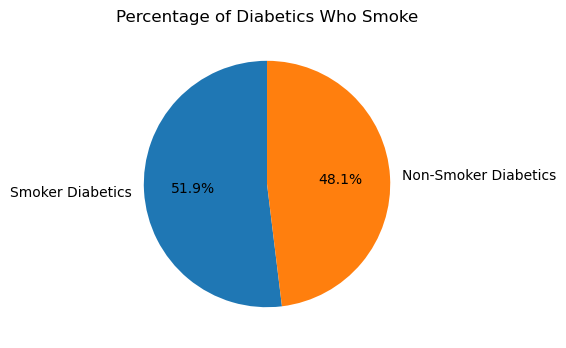

In [37]:
# the percent impact of smoke in diabetic
smoker_diabetics = data[(data['Diabetes'] == 1) & (data['Smoker'] == 1)].shape[0]
non_smoker_diabetics = data[(data['Diabetes'] == 1) & (data['Smoker'] == 0)].shape[0]

labels = ['Smoker Diabetics', 'Non-Smoker Diabetics']
sizes = [smoker_diabetics, non_smoker_diabetics]

plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Diabetics Who Smoke')
plt.show()

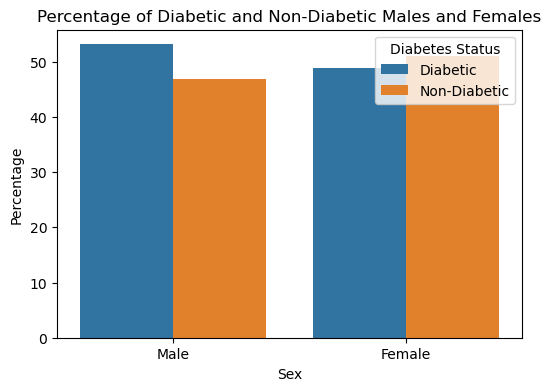

In [38]:
# Count diabetic and non-diabetic males and females
male_diabetic = data[(data['Sex'] == 1) & (data['Diabetes'] == 1)].shape[0]
male_non_diabetic = data[(data['Sex'] == 1) & (data['Diabetes'] == 0)].shape[0]
female_diabetic = data[(data['Sex'] == 0) & (data['Diabetes'] == 1)].shape[0]
female_non_diabetic = data[(data['Sex'] == 0) & (data['Diabetes'] == 0)].shape[0]

# Create a DataFrame for plotting
df = pd.DataFrame({
    'Sex': ['Male', 'Male', 'Female', 'Female'],
    'Diabetes Status': ['Diabetic', 'Non-Diabetic', 'Diabetic', 'Non-Diabetic'],
    'Count': [male_diabetic, male_non_diabetic, female_diabetic, female_non_diabetic]
})

# Calculate percentages
df['Percentage'] = df['Count'] / df.groupby('Sex')['Count'].transform('sum') * 100

# Create a bar plot
plt.figure(figsize=(6, 6))
sns.barplot(x='Sex', y='Percentage', hue='Diabetes Status', data=df)
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.title('Percentage of Diabetic and Non-Diabetic Males and Females')
plt.show()

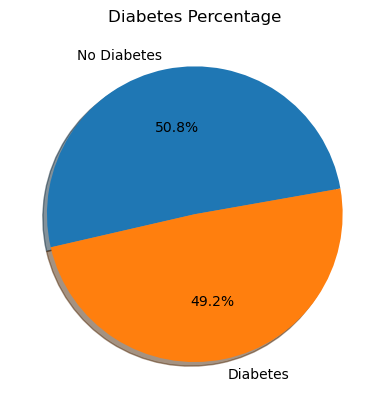

In [39]:
labels = ['No Diabetes', 'Diabetes']

fig, ax = plt.subplots()
ax.pie(data['Diabetes'].value_counts(), labels=labels, autopct='%1.1f%%', shadow=True, startangle=10)
ax.set_title('Diabetes Percentage')
plt.show()

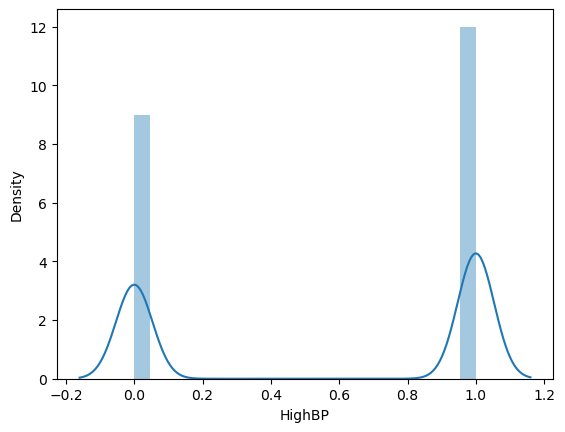

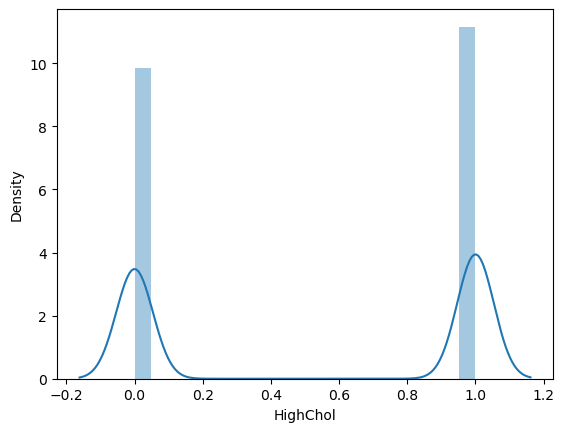

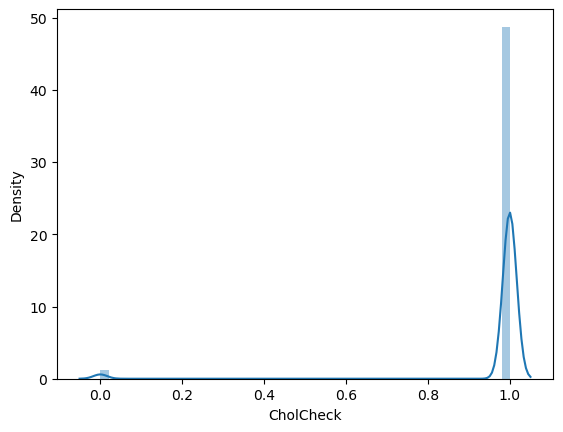

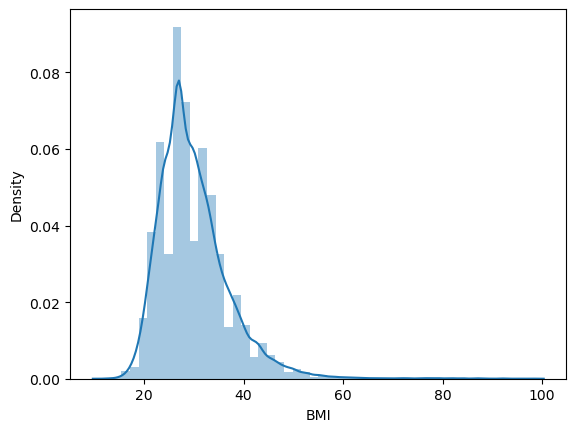

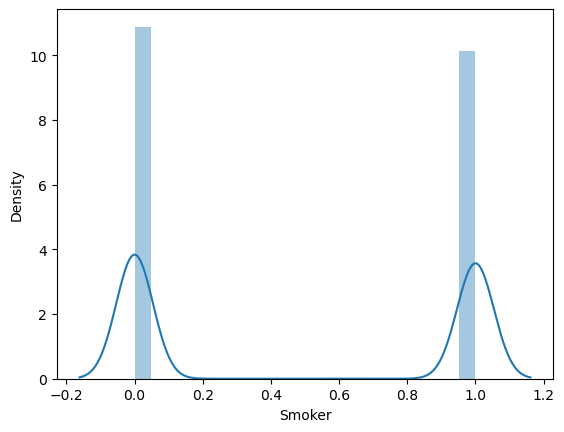

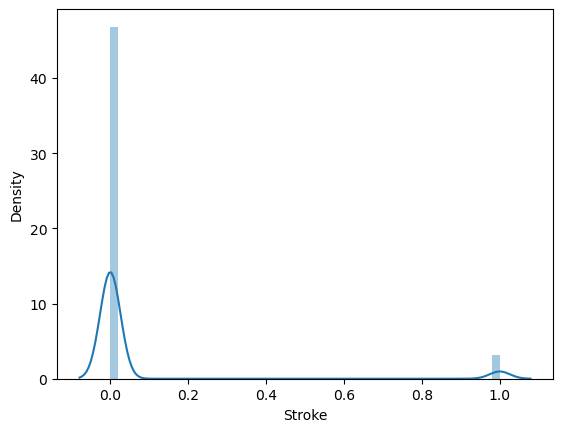

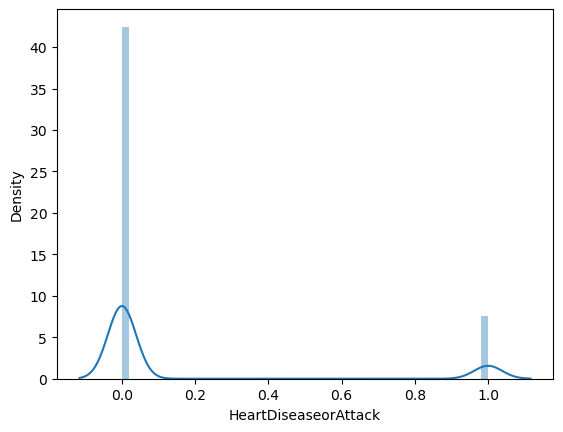

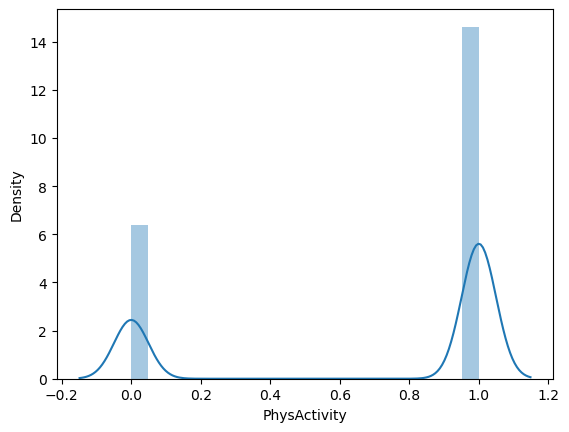

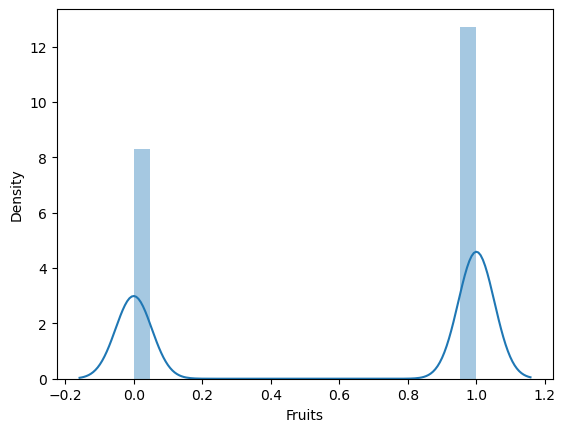

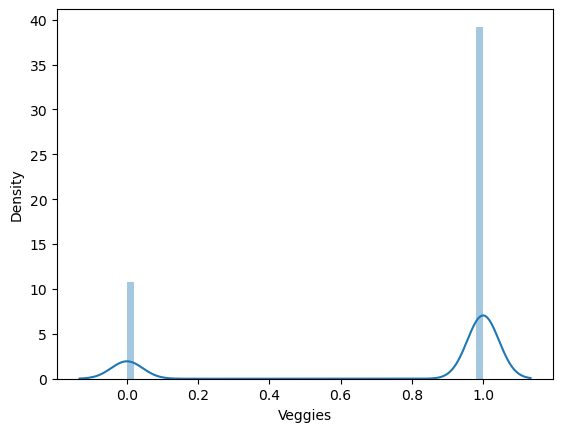

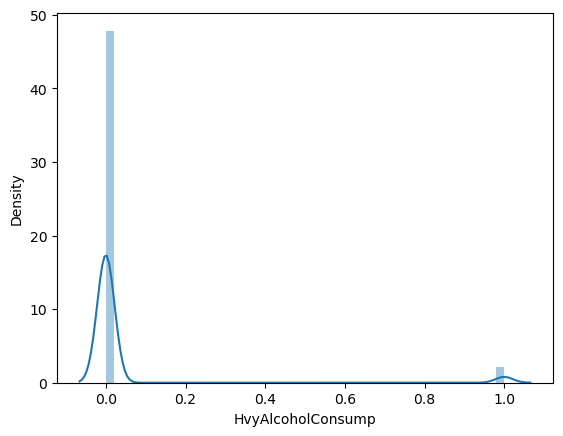

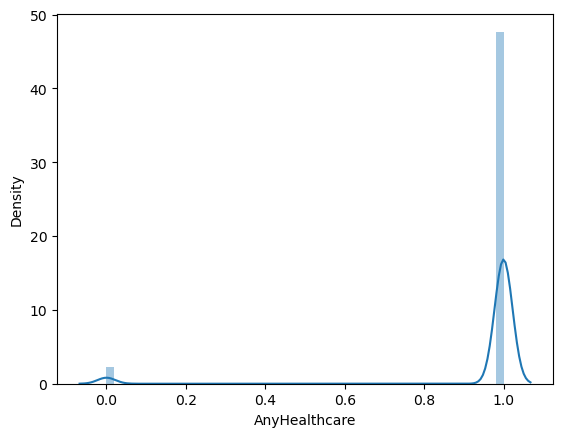

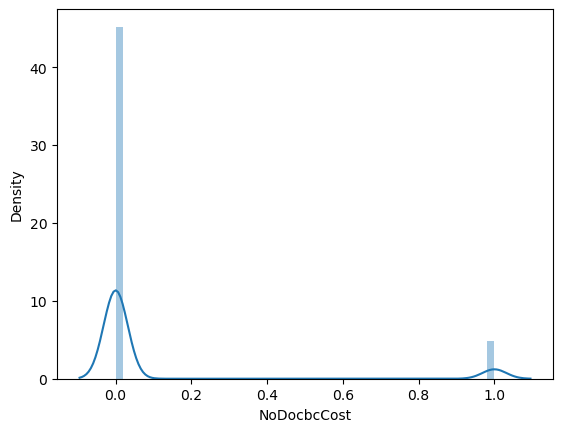

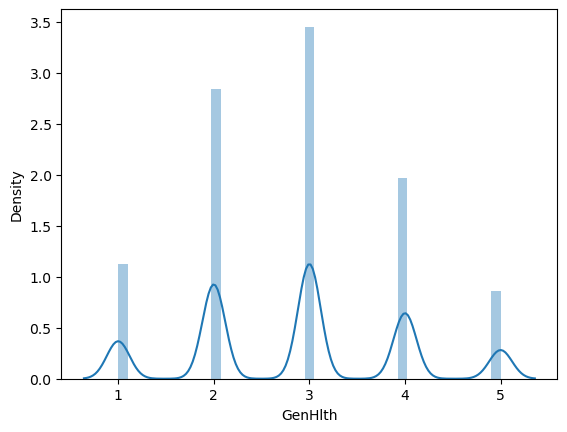

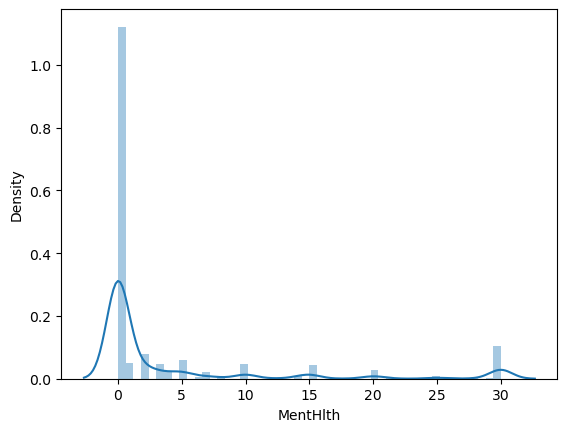

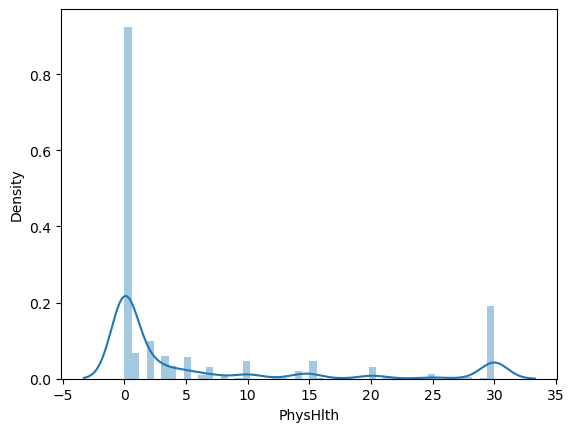

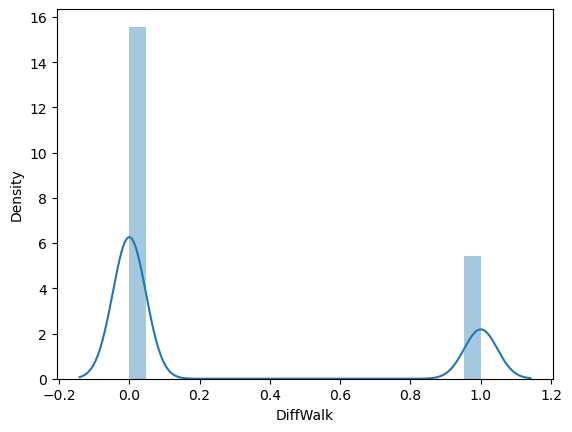

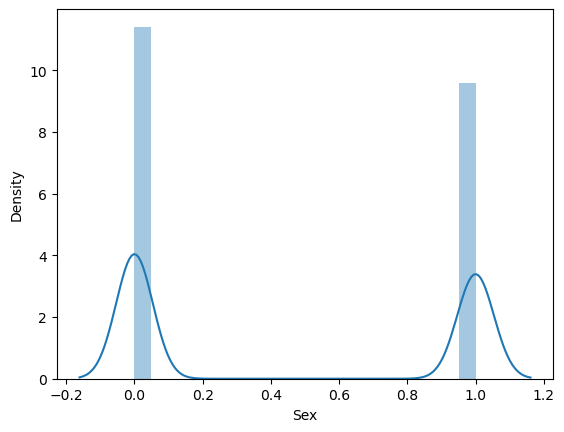

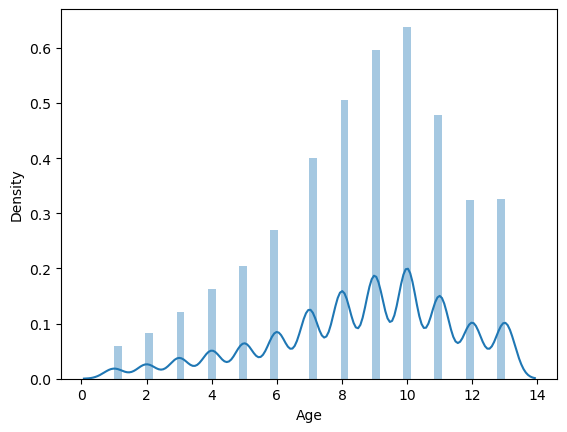

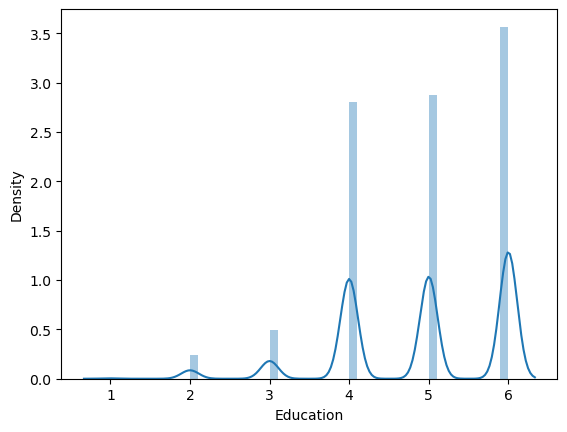

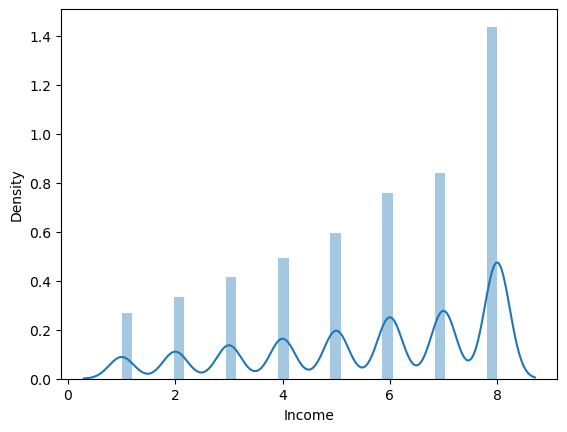

In [40]:
for col in data.columns[:-1]:
  sns.distplot(data[col])
  plt.show()

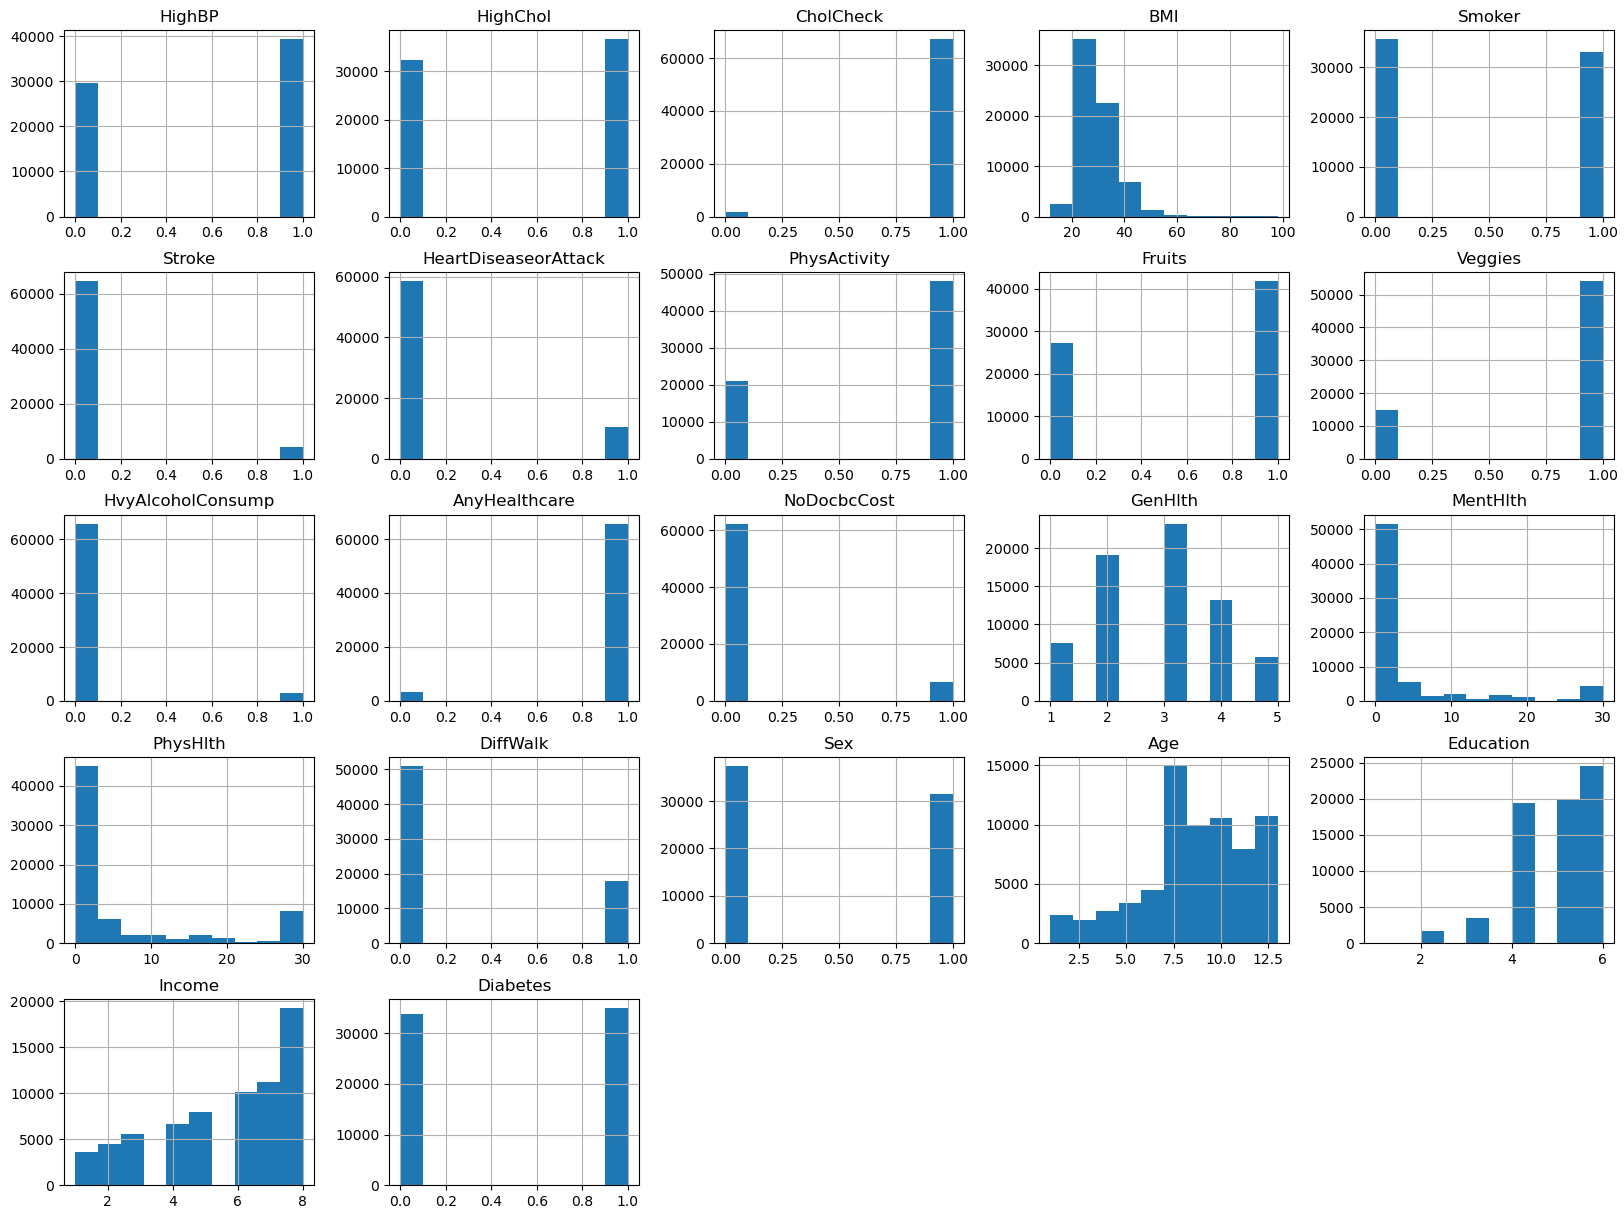

In [41]:
data.hist(figsize=(20,15))
plt.show()

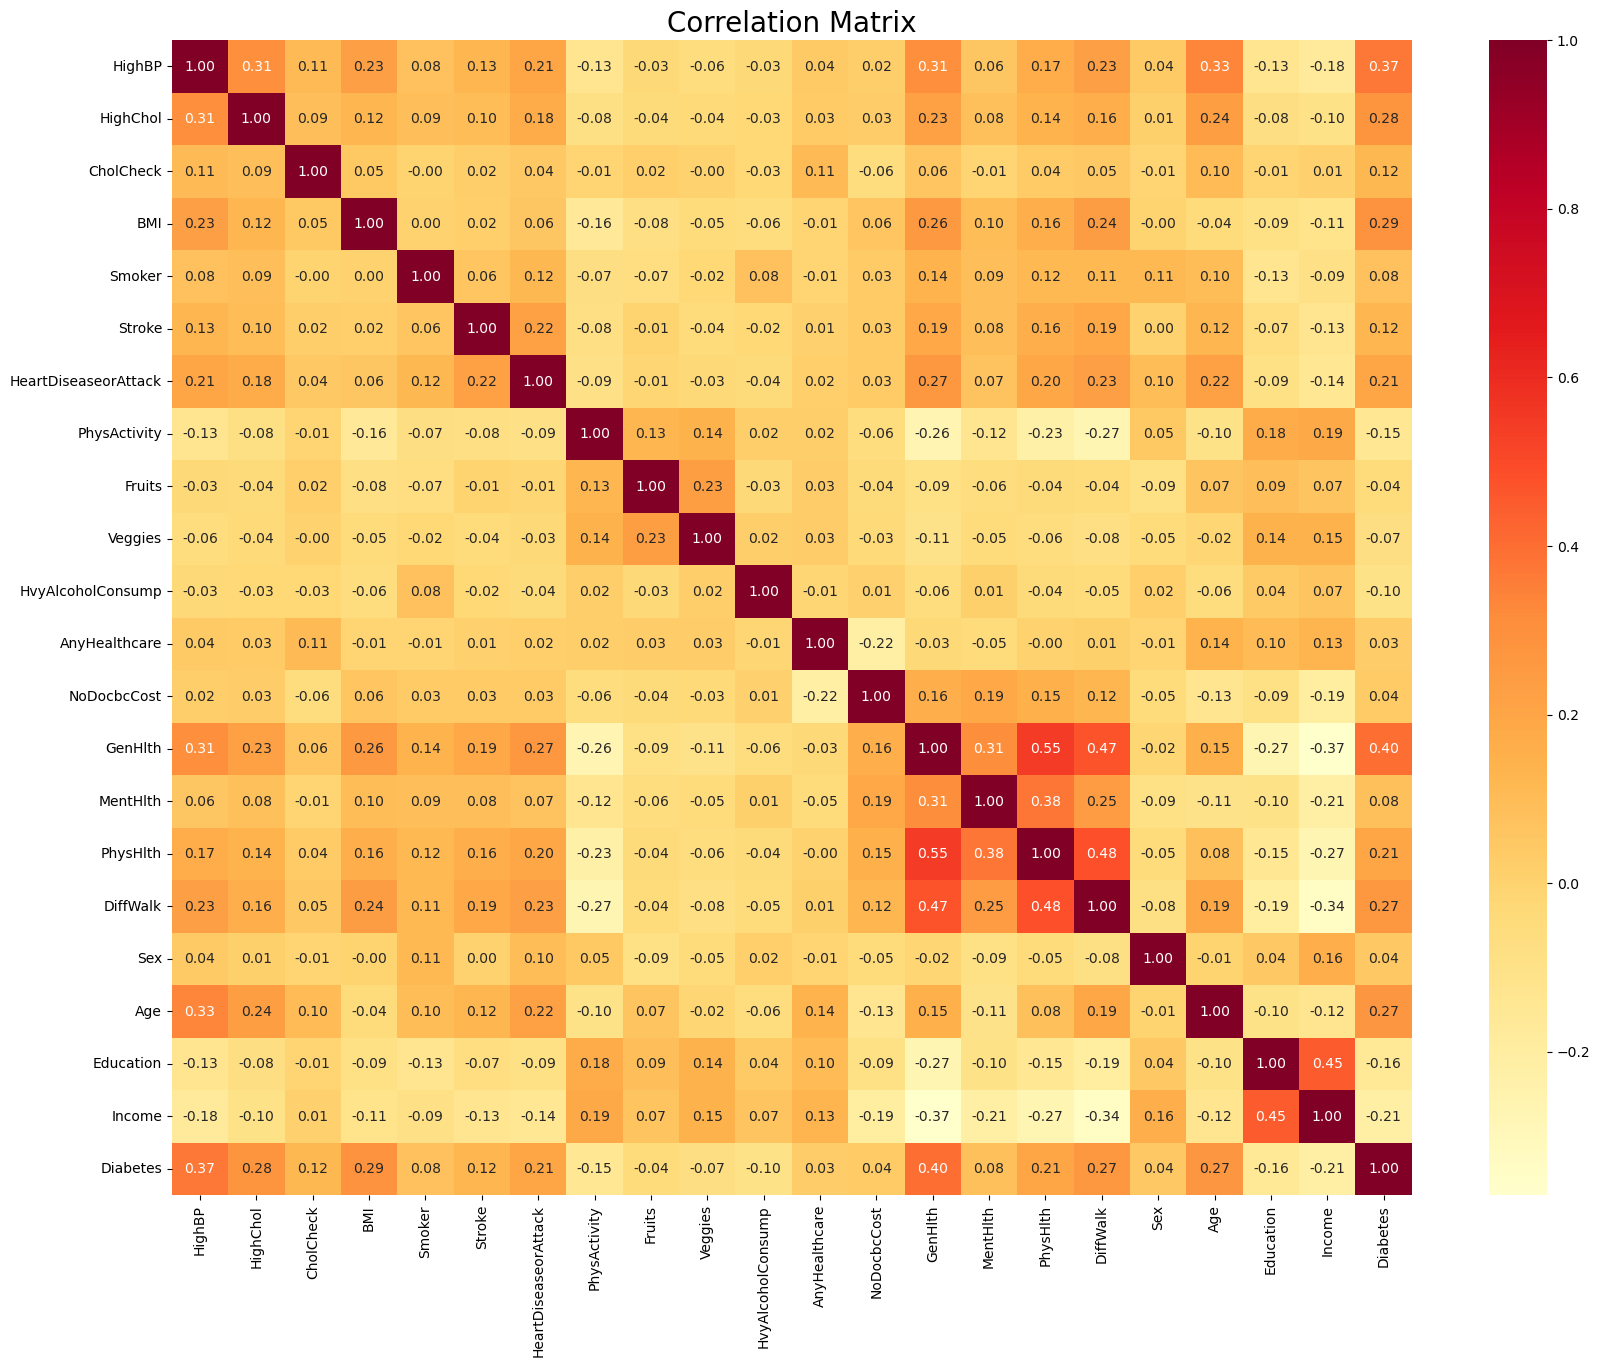

In [42]:
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(data.corr(), annot=True, fmt = '.2f', ax=ax, cmap='YlOrRd')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

# Splitting

In [44]:
data1= data.drop(columns=['CholCheck','Fruits', 'Veggies','NoDocbcCost','MentHlth','CholCheck','Smoker'])
data1.head()

,HighBP,HighChol,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,AnyHealthcare,GenHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
0,1,0,26,0,0,1,0,1,3,30,0,1,4.0,6,8,0
1,1,1,26,1,0,0,0,1,3,0,0,1,12.0,6,8,0
2,0,0,26,0,0,1,0,1,1,10,0,1,13.0,6,8,0
3,1,1,28,0,0,1,0,1,3,3,0,1,11.0,6,8,0
4,0,0,29,0,0,1,0,1,2,0,0,0,8.0,5,8,0


In [45]:
from sklearn.model_selection import train_test_split
x= data1.drop('Diabetes', axis=1)
y= data1['Diabetes']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 1.Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [48]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[4787 1922]
 [1640 5431]]
              precision    recall  f1-score   support

           0       0.74      0.71      0.73      6709
           1       0.74      0.77      0.75      7071

    accuracy                           0.74     13780
   macro avg       0.74      0.74      0.74     13780
weighted avg       0.74      0.74      0.74     13780



# 2.Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [51]:
from sklearn.metrics import confusion_matrix, classification_report
rf_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, rf_pred)
print(cm)
print(classification_report(y_test, rf_pred))

[[4593 2116]
 [1741 5330]]
              precision    recall  f1-score   support

           0       0.73      0.68      0.70      6709
           1       0.72      0.75      0.73      7071

    accuracy                           0.72     13780
   macro avg       0.72      0.72      0.72     13780
weighted avg       0.72      0.72      0.72     13780



# 3.knn

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [54]:
knn_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, knn_pred)
print(cm)
print(classification_report(y_test, knn_pred))

[[4553 2156]
 [2033 5038]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.68      6709
           1       0.70      0.71      0.71      7071

    accuracy                           0.70     13780
   macro avg       0.70      0.70      0.70     13780
weighted avg       0.70      0.70      0.70     13780



# 4.Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [57]:
dtc_pred = dtc.predict(x_test)
cm = confusion_matrix(y_test, dtc_pred)
print(cm)
print(classification_report(y_test, dtc_pred))

[[4460 2249]
 [2592 4479]]
              precision    recall  f1-score   support

           0       0.63      0.66      0.65      6709
           1       0.67      0.63      0.65      7071

    accuracy                           0.65     13780
   macro avg       0.65      0.65      0.65     13780
weighted avg       0.65      0.65      0.65     13780



# 5.Support Vector Machine (SVM)

In [59]:
from sklearn.svm import SVC
#from sklearn.metrics import confusion_matrix, classification_report
svm= SVC()
svm.fit(x_train,y_train)

SVC()

In [60]:
svm_pred = svm.predict(x_test)
cm = confusion_matrix(y_test, svm_pred)
print(cm)
print(classification_report(y_test, svm_pred))

[[4590 2119]
 [1381 5690]]
              precision    recall  f1-score   support

           0       0.77      0.68      0.72      6709
           1       0.73      0.80      0.76      7071

    accuracy                           0.75     13780
   macro avg       0.75      0.74      0.74     13780
weighted avg       0.75      0.75      0.74     13780



# Model Comparison and Conclusions

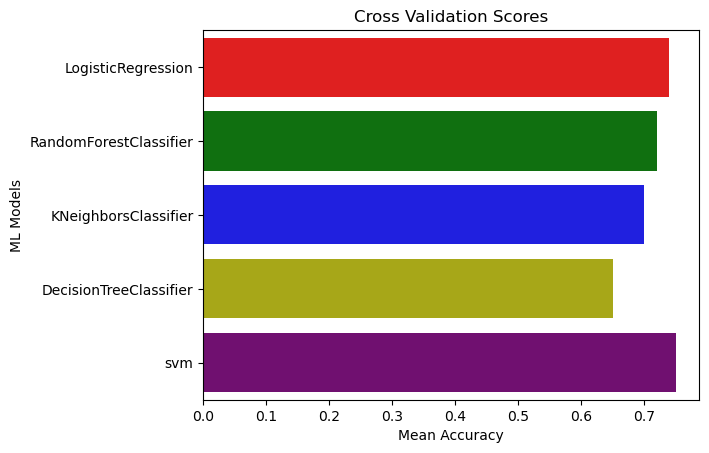

In [62]:
cv_results = pd.DataFrame({
 "Cross Validation Means": [0.74,0.72,0.70,0.65,0.75],
 "ML Models": ["LogisticRegression","RandomForestClassifier","KNeighborsClassifier",
               "DecisionTreeClassifier","svm"]
})

# Use sns.barplot with data as the DataFrame
colour=['r','g','b','y','purple']
g = sns.barplot(x="Cross Validation Means", y="ML Models", data=cv_results,palette=colour)

# Set labels and title
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

# Show the plot
plt.show()

# Conclusion

In this project, we build various models like logistic regression, randomforest classifier, KNeighbours classifier, DecisionTree classifier, SVM. 
A SVM  gives the highest accuracy score of 75.00 percent among all the ML Models.                                
So for the Diabetes prediction SVM is best model.

In [66]:
def predict_diabetes():
  # Get feature input from the user
  HighBP = int(input("Enter HighBP (0 or 1): "))
  HighChol = int(input("Enter HighChol (0 or 1): "))
  BMI = int(input("Enter BMI: "))
  Stroke = int(input("Enter Stroke (0 or 1): "))
  HeartDiseaseorAttack = int(input("Enter HeartDiseaseorAttack (0 or 1): "))
  PhysActivity = int(input("Enter PhysActivity (0 or 1): "))
  HvyAlcoholConsump = int(input("Enter HvyAlcoholConsump (0 or 1): "))
  AnyHealthcare = int(input("Enter AnyHealthcare (0 or 1): "))
  GenHlth = int(input("Enter GenHlth (1-5): "))
  PhysHlth = int(input("Enter PhysHlth (0-30): "))
  DiffWalk = int(input("Enter DiffWalk (0 or 1): "))
  Sex = int(input("Enter Sex (0 for Female, 1 for Male): "))
  Age = int(input("Enter Age (1-13): "))
  Education = int(input("Enter Education (1-6): "))
  Income = int(input("Enter Income (1-8): "))

  # Create a list of features
  features = [HighBP, HighChol, BMI, Stroke, HeartDiseaseorAttack, PhysActivity,
              HvyAlcoholConsump, AnyHealthcare, GenHlth, PhysHlth, DiffWalk,
              Sex, Age, Education, Income]

  # Convert features to a NumPy array and reshape for prediction
  features_array = np.array(features).reshape(1, -1)

  # Use the trained Random Forest model to make a prediction
  prediction = rf.predict(features_array)[0]

  # Return the prediction result as a string
  return 'Diabetic' if prediction == 1 else 'Non-Diabetic'

# Example usage:
prediction_result = predict_diabetes()
print(f"Prediction: {prediction_result}")

Enter HighBP (0 or 1):  0
Enter HighChol (0 or 1):  0
Enter BMI:  22
Enter Stroke (0 or 1):  0
Enter HeartDiseaseorAttack (0 or 1):  1
Enter PhysActivity (0 or 1):  0
Enter HvyAlcoholConsump (0 or 1):  1
Enter AnyHealthcare (0 or 1):  0
Enter GenHlth (1-5):  3
Enter PhysHlth (0-30):  6
Enter DiffWalk (0 or 1):  0
Enter Sex (0 for Female, 1 for Male):  1
Enter Age (1-13):  6
Enter Education (1-6):  5
Enter Income (1-8):  6


Prediction: Non-Diabetic
